In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
# allmodels = np.load('/home/cheng/BayHunter-master/CH018/results/data/c_models.npy')
# read the model that has the best fit with mode of layers
x_age, y_rsl = np.loadtxt('tutorial/results/best_mode_model.txt').T
# allmodels = allmodels[~np.isnan(allmodels)]
x_age, y_rsl, x_age[1:]-x_age[:-1]

(array([-4.76000000e+02, -3.25460480e+02, -3.08145233e+02, -4.23915024e+01,
        -1.66697025e+00,  2.53899582e+02,  4.22278595e+02,  4.67399292e+02,
         5.57005310e+02,  1.12648511e+03,  1.43985229e+03,  1.85798413e+03,
         1.98753943e+03,  1.99170337e+03]),
 array([-4.0963068 , -3.95558643, -3.79346895, -3.58592343, -3.284091  ,
        -3.15613937, -2.62046504, -2.75850844, -2.42818403, -1.58218074,
        -1.25865841, -0.60949373, -0.21135849, -0.03758349]),
 array([150.53952026,  17.31524658, 265.75373077,  40.72453213,
        255.56655216, 168.37901306,  45.12069702,  89.60601807,
        569.47979736, 313.3671875 , 418.13183594, 129.55529785,
          4.16394043]))

In [45]:
station = 'NJ_CC.csv'
sea_level = pd.read_csv(station)
x_obs_raw = 1950-np.array(sea_level['Age'])
y_obs_raw = np.array(sea_level['RSL'])
sort_idx = np.argsort(x_obs_raw)
x_obs = x_obs_raw[sort_idx]
y_obs = y_obs_raw[sort_idx]

y_pred = np.interp(x_obs, x_age, y_rsl)

In [46]:
x_obs, y_pred

(array([-476, -455, -401, -339, -329, -319, -314, -307, -301, -292, -264,
        -240, -200, -124,  -87,  -53,  -40,  -19,   27,  148,  311,  335,
         387,  404,  409,  424,  457,  470,  477,  481,  490,  498,  505,
         514,  522,  533,  538,  551,  564,  573,  585,  604,  626,  666,
         685,  699,  708,  720,  732,  747,  767,  787,  804,  819,  835,
         849,  871,  907,  939,  967,  969,  994, 1009, 1010, 1024, 1029,
        1036, 1065, 1108, 1119, 1135, 1154, 1173, 1181, 1209, 1226, 1238,
        1248, 1255, 1286, 1294, 1318, 1323, 1420, 1463, 1509, 1521, 1532,
        1594, 1604, 1612, 1645, 1661, 1687, 1700, 1727, 1756, 1785, 1790,
        1803, 1829, 1861, 1864, 1867, 1873, 1877, 1882, 1887, 1894, 1904,
        1907, 1911, 1912, 1915, 1925, 1934, 1941, 1947, 1954, 1959, 1962,
        1965, 1967, 1969, 1971, 1975, 1978, 1983, 1986, 1987, 1988, 1989,
        1991, 1993, 1995, 2017]),
 array([-4.0963068 , -4.07667656, -4.02619878, -3.96824282, -3.95889508,
     

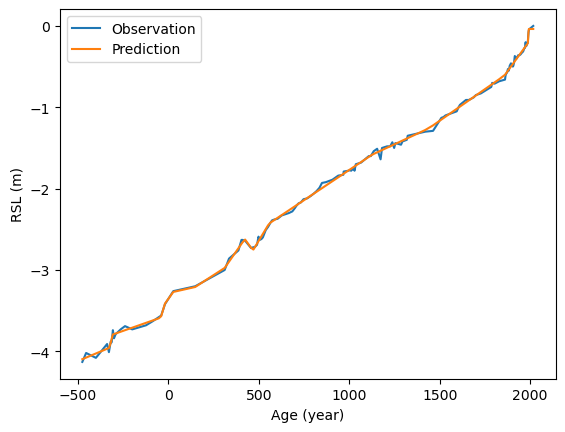

In [47]:
plt.plot(x_obs, y_obs, label = 'Observation')
plt.plot(x_obs, y_pred, label='Prediction')
plt.xlabel('Age (year)')
plt.ylabel('RSL (m)')
plt.legend()

Text(0, 0.5, 'RSL change rate (mm/year)')

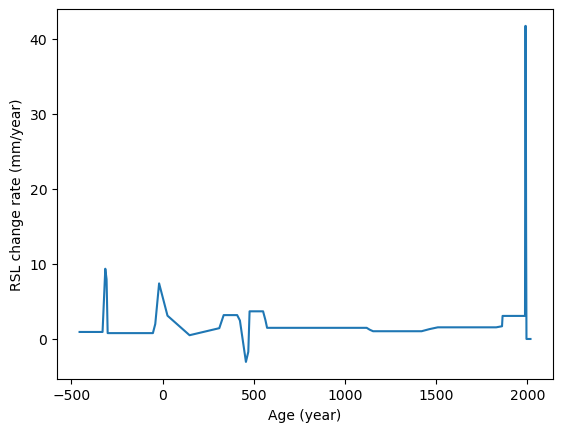

In [48]:
plt.plot(x_obs[1:], (y_pred[1:]-y_pred[:-1])/(x_obs[1:]-x_obs[:-1])*1000)
plt.xlabel('Age (year)')
plt.ylabel('RSL change rate (mm/year)')

The average rsl residual is -0.0007252342447550165


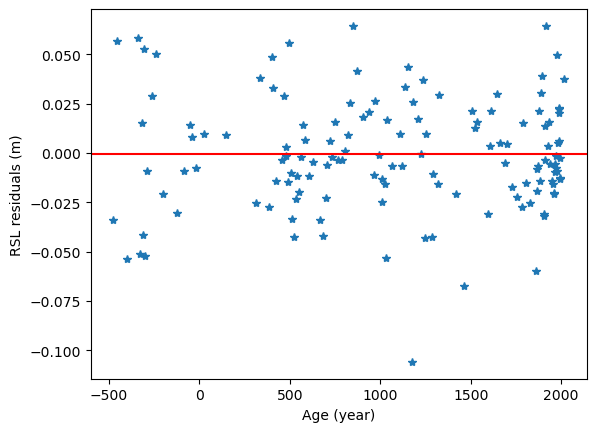

In [49]:
plt.plot(x_obs, y_obs-y_pred, '*')
plt.xlabel('Age (year)')
plt.ylabel('RSL residuals (m)')
print('The average rsl residual is', np.mean(y_obs-y_pred))
plt.axhline(np.mean(y_obs-y_pred), c='r')

Text(0.5, 0, 'Residuals')

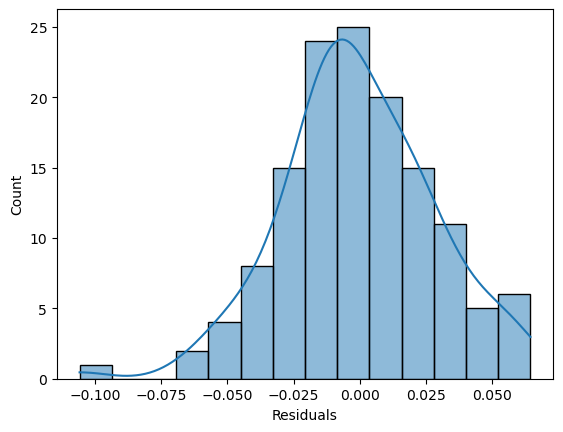

In [50]:
import seaborn as sns
sns.histplot(y_obs-y_pred, kde=True)
plt.xlabel('Residuals')

In [72]:
len(x_obs)

136